Epoch 000 | loss=0.2534
Epoch 020 | loss=0.2280
Epoch 040 | loss=0.2215
Epoch 060 | loss=0.2176
Epoch 080 | loss=0.2119
Epoch 100 | loss=0.2017
Epoch 120 | loss=0.1832
Epoch 140 | loss=0.1527
Epoch 160 | loss=0.1111
Epoch 180 | loss=0.0709

Final predictions:
 [[0.84054464]
 [0.27825674]
 [0.82581205]]


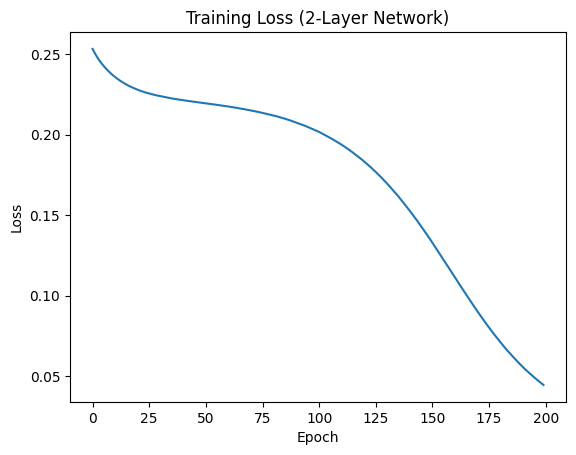

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data ---
X = np.array([[0.6, 0.2, 0.9],
              [0.1, 0.5, 0.3],
              [0.8, 0.9, 0.4]])
y_true = np.array([[1.0], [0.0], [1.0]])  # single output neuron

# --- Initialize weights and biases ---
np.random.seed(42)
W1 = np.random.randn(3, 4) * 0.1   # 3 inputs -> 4 hidden neurons
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1) * 0.1   # 4 hidden -> 1 output neuron
b2 = np.zeros((1, 1))
lr = 0.1

# --- Activations ---
def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# --- Training ---
losses = []
for epoch in range(200):
    # ---- Forward pass ----
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    loss = np.mean((y_true - y_pred) ** 2)
    losses.append(loss)

    # ---- Backward pass ----
    dL_dy = 2 * (y_pred - y_true)                   # (3,1)
    dy_dz2 = sigmoid_derivative(z2)                 # (3,1)
    dL_dz2 = dL_dy * dy_dz2                         # (3,1)

    dL_dW2 = np.dot(a1.T, dL_dz2)                   # (4,1)
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)  # (1,1)

    dz2_da1 = W2.T                                  # (1,4)
    dL_da1 = np.dot(dL_dz2, dz2_da1)                # (3,4)
    da1_dz1 = relu_derivative(z1)
    dL_dz1 = dL_da1 * da1_dz1

    dL_dW1 = np.dot(X.T, dL_dz1)                    # (3,4)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)  # (1,4)

    # ---- Update weights ----
    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2

    if epoch % 20 == 0:
        print(f"Epoch {epoch:03d} | loss={loss:.4f}")

# --- Results ---
print("\nFinal predictions:\n", y_pred)

plt.plot(losses)
plt.title("Training Loss (2-Layer Network)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


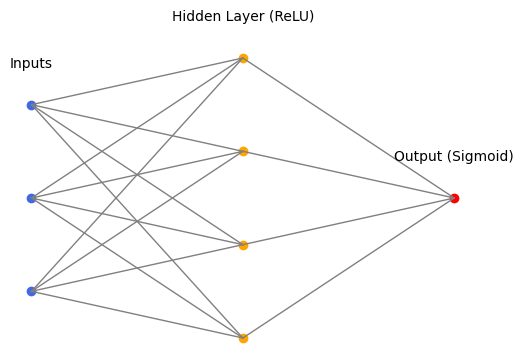

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis("off")
for i, y in enumerate([3, 2, 1]):
    ax.plot(0, y, "o", color="royalblue")
for i, y in enumerate([3.5, 2.5, 1.5, 0.5]):
    ax.plot(2, y, "o", color="orange")
ax.plot(4, 2, "o", color="red")

for y1 in [3,2,1]:
    for y2 in [3.5,2.5,1.5,0.5]:
        ax.plot([0,2], [y1,y2], color="gray", lw=1)
for y2 in [3.5,2.5,1.5,0.5]:
    ax.plot([2,4], [y2,2], color="gray", lw=1)

ax.text(0, 3.4, "Inputs", ha="center")
ax.text(2, 3.9, "Hidden Layer (ReLU)", ha="center")
ax.text(4, 2.4, "Output (Sigmoid)", ha="center")
plt.show()
